<h1>Simple Linear Regression Model</h1>

<p>This notebook implements a simple model for predicting car price.

In [14]:
# Import libraries that will be used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Load the data. You may need to change the path for your environment.
<ul>
    <li>If you're working in Anaconda, copy the .csv file to the same directory as the notebooks</li>
    <li>If you're working in Watson Studio, import the data file as a data asset and use code generation to insert it.</li>
</ul>

In [15]:
# This syntax is for reading in Anaconda/Jupyter labs - the csv file is in the same dir as the notebook
df = pd.read_csv("autoPrices.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


Since we're working on a simple example, let's select the variables based on our *business knowledge*. Feature selection is an important process for modeling, and we'll review it in more detail in another lab. 

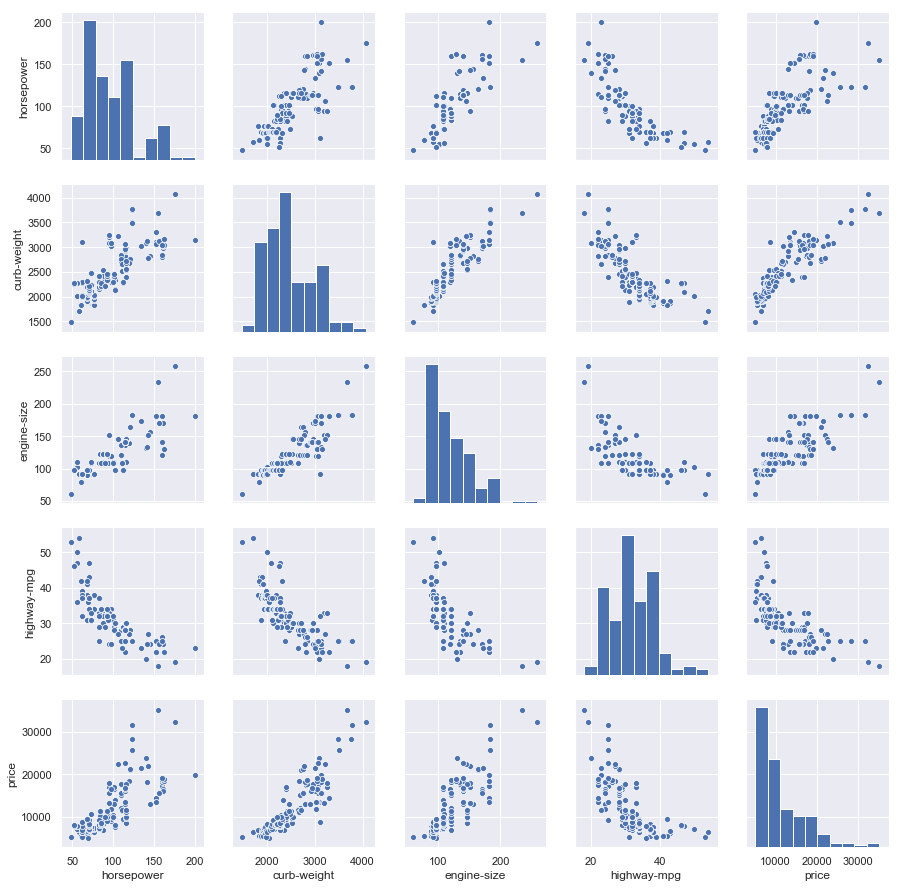

In [16]:
# Select features which we think would be good predictors (based on the business knowledge) 
features = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
target = df['price']

# Even though we selected features based on "business knowledge", let's do a quick check to see if features are correlated to the target variable
# In the graph, check correlation of Price to all features (last column)
featuresForCorrelation = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','price']]
sns.pairplot(featuresForCorrelation)

In general, correlation higher than 0.7 is considred a strong correlation

In [17]:
# We can also print the correlation
featuresForCorrelation.corr(method ='pearson') 

,horsepower,curb-weight,engine-size,highway-mpg,price
horsepower,1.000000,0.790095,0.812073,-0.827941,0.759874
curb-weight,0.790095,1.000000,0.888626,-0.789338,0.893639
engine-size,0.812073,0.888626,1.000000,-0.714095,0.841496
highway-mpg,-0.827941,-0.789338,-0.714095,1.000000,-0.720090
price,0.759874,0.893639,0.841496,-0.720090,1.000000


In [18]:
# Split data into train (80 percent) and test (20 percent)
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.8, random_state=123)
x_train.describe()

,horsepower,curb-weight,engine-size,highway-mpg
count,31.000000,31.000000,31.000000,31.000000
mean,100.709677,2580.000000,125.387097,30.580645
std,32.659040,548.506214,35.980251,5.481935
min,62.000000,1918.000000,90.000000,19.000000
25%,71.500000,2222.000000,98.000000,26.500000
50%,94.000000,2410.000000,121.000000,31.000000
75%,116.000000,3023.000000,138.500000,32.500000
max,176.000000,4066.000000,258.000000,41.000000


Next, we will build a linear regression model. When multiple variables are used to predict a continuous target variable the term <b> Multiple Linear Regression </b> is used, but for simplicity, we'll refer to it as linear regression.  

In [19]:
# Create a linear regression object
lm = LinearRegression()

# Train the model
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# Let's look up the value of the intercept - we can display this value in a formula
lm.intercept_

-15773.92078677326

In [21]:
# Let's look up the value of the coefficients - we can display these values in a formula
lm.coef_

array([  1.35204984,  11.77707641,  -4.22349966, -63.36749309])

If you would like to display the equiasion or your model, replace all nubmer in this equiasion with your intercept/coefficients
<b>Price</b> = -15773.92078677326 + 1.35204984 x <b>horsepower</b> + 11.77707641 x <b>curb-weight</b> - 4.22349966 x <b>engine-size</b> -63.36749309 x <b>highway-mpg</b>

In [30]:
predictedValues = lm.predict(x_test)

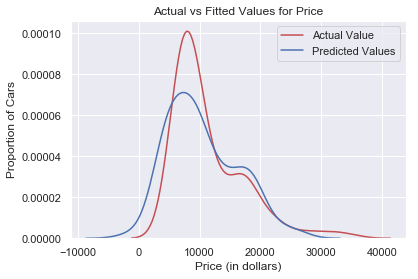

In [25]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predictedValues, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, with the exception of the price point between appoximately 5000 and 8000.</p>

In [26]:
r_squared = r2_score(y_test, predictedValues)
mae = np.mean(abs(predictedValues - y_test))
rmse = np.sqrt(np.mean((predictedValues - y_test)**2))

# Create a data frame for storing results from each model
summary_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error'])
summary_df['Linear Regression, all variables'] = [r_squared, mae, rmse]
summary_df

,"Linear Regression, all variables"
R-squared,0.733379
Mean Absolute Error,2074.464928
Root Mean Squared Error,2850.318071
